# ÊîøÊ≤ªË≥áÊñôÊñáÂ≠óÊé¢Âãò
### ‰∏ªË¶ÅÁõÆÁöÑÔºöÊé¢Ë®éÂú®1124ÈÅ∏ÂâçÔºåÈ´òÈõÑÂÖ©‰Ωç‰∏ªË¶ÅÂÄôÈÅ∏‰∫∫-Èô≥ÂÖ∂ÈÇÅ„ÄÅÈüìÂúãÁëúÔºåÂú®Á§æÁæ§Á∂≤Á´ô‰∏äÁôºÊñáÂÖßÂÆπÁöÑÊìç‰Ωú
#### ÊñπÊ≥ïÔºöÂà©Áî®ÊñáÂ≠óÈõ≤ÊâæÂá∫ÂÖ©‰ΩçÂÄôÈÅ∏‰∫∫ÂàÜÂà•ËºÉÈóúÂøÉÁöÑË≠∞È°åÔºåÂÜçÊØîËºÉÂú®ÂêåË≠∞È°å‰∏ãÔºåÂÖ©‰ΩçÂÄôÈÅ∏‰∫∫ÁöÑÊÖãÂ∫¶ÁÇ∫‰Ωï

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import jieba
import numpy as np
from collections import Counter
import pandas as pd
import math as ma
df = pd.read_csv("/Users/jen/Downloads/201901_data Êã∑Ë≤ù.xls")
df=df[['Date','Page_Name','LIKE_COUNT','Message']]
df.head(5)

Date      Page_Name  LIKE_COUNT  \
0  2019/01/01 01:00:49            ÊüØÊñáÂì≤       44256   
1  2019/01/01 17:59:00  udn.com ËÅØÂêàÊñ∞ËÅûÁ∂≤       29018   
2  2019/01/01 11:54:52            ÈüìÂúãÁëú       28943   
3  2019/01/01 00:01:48            ÈüìÂúãÁëú       25439   
4  2019/01/01 00:48:38  udn.com ËÅØÂêàÊñ∞ËÅûÁ∂≤       23037   

                                             Message  
0                        2018ÁöÑÈ¢®Èõ®ÈÉΩÈÅéÂéª‰∫ÜÔºåÂè∞ÁÅ£ÂêëÂâçËµ∞ÔºåÊàëÂÄëËøéÂêë2019„ÄÇ  
1       ÈüìÂúãÁëúÊÑüÂòÜÔºö„ÄåÊàëÂÄëÂ•ΩÂ§ö‰∫∫Â•Ω‰πÖÂ•Ω‰πÖÊ≤íÊúâÊÑõËá™Â∑±ÁöÑÂúãÂÆ∂‰∫ÜÔºÅ„Äç\n„ÄÄ\n#ÂÖÉÊó¶ #ÈüìÂúãÁëú #ÂúãÊóó  
2  „Äê2019Á¨¨‰∏ÄÈÅìÊõôÂÖâ„Äë\n\nÁï∂2019Âπ¥ÁöÑÁ¨¨‰∏ÄÈÅìÊõôÂÖâÂú®ÊúùÈõ®Á∂øÁ∂øË£°ÔºåÂæûÂ§ßÊ≠¶Â±±ÁöÑÂ±±È°õÂá∫ÁôºÔºåÁÖß‰∫Æ...  
3  „Äê2019Êñ∞Âπ¥Êñ∞Â∏åÊúõ„Äë\n\nÂêÑ‰ΩçÂ•ΩÊúãÂèãÂÄëÔºå2019Êñ∞Âπ¥Âø´Ê®ÇÔºÅ\n\n‰∏çÁü•ÈÅìÂêÑ‰Ωç2018ÁöÑÈ°ò...  
4        „ÄåÊòØÂè∞ÁÅ£ÊâÄÊúâÁ∏£Â∏ÇË∑®Âπ¥ÊôöÊúÉ‰∫∫Êï∏ÊúÄÂ§öÁöÑ„ÄçÔºå‰∏çÂæó‰∫ÜÔΩûÔΩûÔΩû\n \n#ÈüìÂúãÁëú #Â§¢ÊôÇ‰ª£ #Ë∑®Âπ¥

In [2]:
df.iloc[-3:]

Date           Page_Name  LIKE_COUNT  \
43663  2019/01/31 18:25:01              Á¨®ËõãÔºåÊàëÊÑõ‰Ω†           0   
43664  2019/01/31 20:37:37            Áî∑‰∫∫ÂøÉË£°ÈÇ£Èªû‰∫ãÂÖí           0   
43665  2019/01/31 11:17:51  MyGoNews‰∏çÂãïÁî¢Á∂≤Ë∑ØÊñ∞ËÅûÁ≤âÁµ≤Âúò           0   

                                                 Message  
43663                             ‰∫∫ÂÆ∂ÂÅöÂñÑ‰∫ã‰πüË¶ÅÂ´å....\nÁúüÁöÑË†ªËé´ÂêçÂÖ∂Â¶ôÁöÑ  
43664                                                NaN  
43665  üó£üó£ÁõßÁßÄÁáï ÂÖÅË´æÂÆåÊï¥ÁôºÂ±ïË±êÂéüÂú®Âú∞Âª∫Ë®≠ËàáÁîüÊ¥ªüèóüèò\n\n#Âè∞‰∏≠Â∏ÇÈï∑ÁõßÁßÄÁáï Ëá™1ÊúàËµ∑ÂïüÂãï„Äå#Ë°åÂãï...

In [3]:
df.shape

(43666, 4)

In [4]:
s='/Users/jen/Downloads/20180{n}_data Êã∑Ë≤ù.xlsx'
t='/Users/jen/Downloads/2018{n}_data Êã∑Ë≤ù.xlsx'
for i in range(1,10):
    df2=pd.read_csv(s.format(n=i))
    df2=df2[['Date','Page_Name','LIKE_COUNT','Message']]
    df=df.append(df2)
for i in range(10,13):
     df2=pd.read_csv(t.format(n=i))
     df2=df2[['Date','Page_Name','LIKE_COUNT','Message']]
     df=df.append(df2)
df.shape

(410913, 4)

In [5]:
df=df.dropna(axis=0,how='any')
df.shape

(364613, 4)

In [6]:
df.iloc[-10:]

Date        Page_Name  LIKE_COUNT  \
51089  2018/12/31 21:25:00             ËÆöËµ∑‰æÜÂêß           0   
51090  2018/12/31 07:08:03      ·É¶ÈÇ£‰∫õÊÑõÊÉÖ ÂøÉÊÉÖË™ûÈåÑ·É¶           0   
51091  2018/12/31 11:25:00  ·É¶ ÊúâÊú¨‰∫ã„ÄÅÂ∞±ÂíåÊàëÂ§©ÈïøÂú∞‰πÖ ·É¶           0   
51092  2018/12/31 17:15:01  ÊåáÂÇ≥Â™í Fingermedia           0   
51093  2018/12/31 12:25:00          ÂèØÊÑõÂãïÁâ©ÊÑõÂæàÂ§ß           0   
51094  2018/12/31 15:15:03         PChomeÊñ∞ËÅû           0   
51095  2018/12/31 15:10:00   Life is a gift           0   
51096  2018/12/31 15:10:00   Beautiful Life           0   
51097  2018/12/31 15:40:58  ÊåáÂÇ≥Â™í Fingermedia           0   
51098  2018/12/31 11:07:51            ÁúÅÈå¢ÁâπÂø´Ëªä           0   

                                                 Message  
51089                   Âú∞ÁçÑÁ¥ö‰∫§ÊèõÁ¶ÆÁâ©Ôºå\nÂ¶ÇÊûúÊòØ‰Ω†ÊäΩÂà∞Âì™‰∏ÄÂÄãÊúÉÁõ¥Êé•ÁàÜËµ∞Ôºü\n#‰∫§ÊèõÁ¶ÆÁâ©  
51090             È©óÁ•®Á¨¨4Â§©ÔºÅÊ≥ïÂÆòÂãïÁî®„ÄåÊîæÂ§ßÈè°„ÄÅÊâãÈõªÁ≠í„ÄçÊü•Âà∞Â∫ï„ÄÄ„ÄåÁõÆÂâçÁ•®Êï∏Â∑ÆË∑ù„ÄçËÆì‰∏ÅÂÆà‰∏≠ËáâÁ∂†‰∫Ü  
51091                               Ê†πÊú¨ÂÆåÂÖ®Ê≤íËÆäÂïäÔºÅ\n\n#Á´•È°è\n#ÂáçÈΩ°  
51092  „ÄêË®òËÄÖÂºµ‰∏ñÊòåÔºèÂè∞‰∏≠Â†±Â∞é„Äë Âè∞‰∏≠Â∏ÇÊîøÂ∫ú‰ªä(31)ÊôöÂêåÊ≠•ÊñºÈ∫óÂØ∂Ê®ÇÂúíÁ¨¨‰∫åÂÅúËªäÂ†¥ÂèäÂúìÊªøÊà∂Â§ñÂäáÂ†¥Êö®ÊñáÂøÉ...  
51093                                ÊúâÁ•ûÂø´ÊãúXD\n\n#ÈüìÂúãÁëú\n#ÊûúËèú  
51094                       ÈüìÂúãÁëúÁ®±„Äå2020ÊúâÂÄãÁõ∏ÂÖ¨ËÉ°‰∏ç‰∫ÜÁâå„Äç ÁæÖÂèãÂøóÊé®Ê∏¨ÊòØ„Äå‰ªñ„Äç  
51095  „ÄåÂáçËíú„ÄçÈ´òÈõÑÂ∏ÇÂ∏ÇÈï∑ÁöÑÈüìÂúãÁëúÂú®Êó•ÂâçÂÖ¨ÈñãË°®Á§∫ÔºåÂú®Áà≠ÂèñÈÄêÊ≠•ÈñãÊîæÈô∏Ë≥á‰æÜÈ´òÈõÑÁöÑÈÅéÁ®ã‰∏≠Ôºå‰πüÂ∏åÊúõËÉΩÂ§†ÂåÖÊã¨Ë≤∑...  
51096  „ÄåÂáçËíú„ÄçÈ´òÈõÑÂ∏ÇÂ∏ÇÈï∑ÁöÑÈüìÂúãÁëúÂú®Êó•ÂâçÂÖ¨ÈñãË°®Á§∫ÔºåÂú®Áà≠ÂèñÈÄêÊ≠•ÈñãÊîæÈô∏Ë≥á‰æÜÈ´òÈõÑÁöÑÈÅéÁ®ã‰∏≠Ôºå‰πüÂ∏åÊúõËÉΩÂ§†ÂåÖÊã¨Ë≤∑...  
51097  „ÄêË®òËÄÖÂΩ≠ÊÖßÂ©â/Ê°ÉÂúíÂ†±Â∞é„ÄëÊ°ÉÂúíÂ∏ÇÈï∑ÈÑ≠ÊñáÁá¶Êó•ÂâçÂú®‰∏≠Â£¢ÂçÄÔºåÂá∫Â∏≠„Äå2018ËÅñË™ïÈÄÅÊöñ‚ÄßÊúâ‰Ω†Èô™‰º¥„Äç‰∫ûÊ¥≤Âª£...  
51098                     ÊóÖÈ§®‰∏ÄÊôö350ÂÖÉÔºüÈªÉÂÅâÂì≤ÔºöËºîÂ∞éËΩâÂûãÈùûÂâäÂÉπÁ´∂Áà≠\n#ÈêµÈÅìÂ§ßÈ£ØÂ∫ó

In [13]:
subset_chen=df[df['Page_Name'] == 'Èô≥ÂÖ∂ÈÇÅ Chen Chi-Mai']
subset_chen.shape

(617, 4)

In [7]:
subset_han=df[df['Page_Name'] == 'ÈüìÂúãÁëú']
subset_han.shape

(329, 4)

### Ê∏ÖÊ¥óË≥áÊñôÔºåÂÅöÊñ∑Ë©ûÂíåÂÅúË©û

#### Èô≥ÂÖ∂ÈÇÅÁöÑÊñáÂ≠óÈõ≤

In [15]:
text_for_chen=subset_chen['Message']

In [17]:
with open('/Users/jen/Desktop/sentence_chen.txt', 'w')as f:
    for i in text_for_chen:
        i=i.strip('\n')
        f.write(i)

In [22]:
#Ë®≠ÂÆöÂ≠óÂÖ∏
jieba.set_dictionary(r'/Users/jen/Downloads/jieba-zh_TW-master-2/jieba/dict.txt')
#Ë®≠ÂÆöËá™Ë®ÇÁöÑÂ≠óÂÖ∏
jieba.load_userdict(r'/Users/jen/Downloads/dic_me.txt')

Building prefix dict from /Users/jen/Downloads/jieba-zh_TW-master-2/jieba/dict.txt ...
Dumping model to file cache /var/folders/cj/rct4y7s563xfycgmg0fgb5j00000gn/T/jieba.ud5c7fb17df94e9d47058587936fdcd55.cache
Loading model cost 0.698 seconds.
Prefix dict has been built succesfully.


In [23]:
#Ë®≠ÂÆöÂÅúÁî®Ë©û
with open(r'/Users/jen/Downloads/stop_word.txt', 'r', encoding='utf8') as f:  
    stops = f.read().split('\n') 

In [25]:
filename=open("/Users/jen/Desktop/sentence_chen.txt")
final=""
s=filename.read()
terms = [t for t in jieba.cut(s, cut_all=True) if t not in stops]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

[('\n', 2561),
 ('È´òÈõÑ', 2345),
 ('\n\n', 2209),
 ('Èô≥ÂÖ∂ÈÇÅ', 1209),
 ('Êú™‰æÜ', 605),
 ('Áî¢Ê•≠', 545),
 ('Â∏ÇÈï∑', 521),
 ('Âè∞ÁÅ£', 479),
 ('È´òÈõÑÂ∏Ç', 461),
 ('ÁôºÂ±ï', 451),
 ('ÈÇÅ', 422),
 ('ÂüéÂ∏Ç', 409),
 ('Êô∫ÊÖß', 387),
 ('Á∂ìÊøü', 318),
 ('ÊàêÁÇ∫', 301),
 ('ÊîØÊåÅ', 295),
 ('Áõ∏‰ø°', 260),
 ('ÊúãÂèã', 240),
 ('Âπ¥', 236),
 ('ÊúÉ', 235),
 ('‰ªäÂ§©', 234),
 ('Ë™™', 228),
 ('Â∏ÇÊ∞ë', 218),
 ('Êé®Âãï', 216),
 ('ÂèÉÈÅ∏', 198),
 ('ÂúãÈöõ', 197),
 ('ÊâìÈÄ†', 195),
 ('ÊñáÂåñ', 192),
 ('Ë°®Á§∫', 187),
 ('ÈÅ∏‰∫∫', 186),
 ('ËΩâÂûã', 184),
 ('Âú∞Êñπ', 181),
 ('ÁîüÊ¥ª', 181),
 ('\n#', 181),
 ('ËßÄÂÖâ', 178),
 ('ÁúãÂ•Ω', 176),
 ('‰∏ÄËµ∑', 175),
 ('‰∏≠', 174),
 ('https', 174),
 ('‰∏≠ÂøÉ', 171),
 ('Êõ¥', 170),
 ('com', 169),
 ('line', 168),
 ('ÂÆòÊñπ', 167),
 ('ÁßëÊäÄ', 166),
 ('ÂúíÂçÄ', 165),
 ('Êå∫', 162),
 ('Âú®Âú∞', 160),
 ('ÊîøÂ∫ú', 156),
 ('Ë≠∞Âì°', 156),
 ('Â∏ÇÂ†¥', 148),
 ('ÂÖ±Âêå', 144),
 ('Âä†ÈÄü', 141),
 ('Â∏åÊúõ', 138),
 ('‰∏ñÁïå', 138),
 ('Ëß£Ê±∫', 137),
 ('ÊÑüË¨ù', 137),


In [32]:
#Â≠óÈ´îË®≠ÂÆö
font = 'Hiragino Sans GB.ttc'
#ÊÉ≥Ë¶ÅÊñáÂ≠óÈõ≤Âá∫ÁèæÁöÑÂúñÁ§∫
mask = np.array(Image.open(r"/Users/jen/Desktop/ÂúñÁâá 1.jpg"))

In [33]:
my_wordcloud = WordCloud(background_color="white",mask=mask,font_path=font,collocations=False, width=2400, height=2400, margin=2)  
my_wordcloud.generate_from_frequencies(frequencies=Counter(terms))

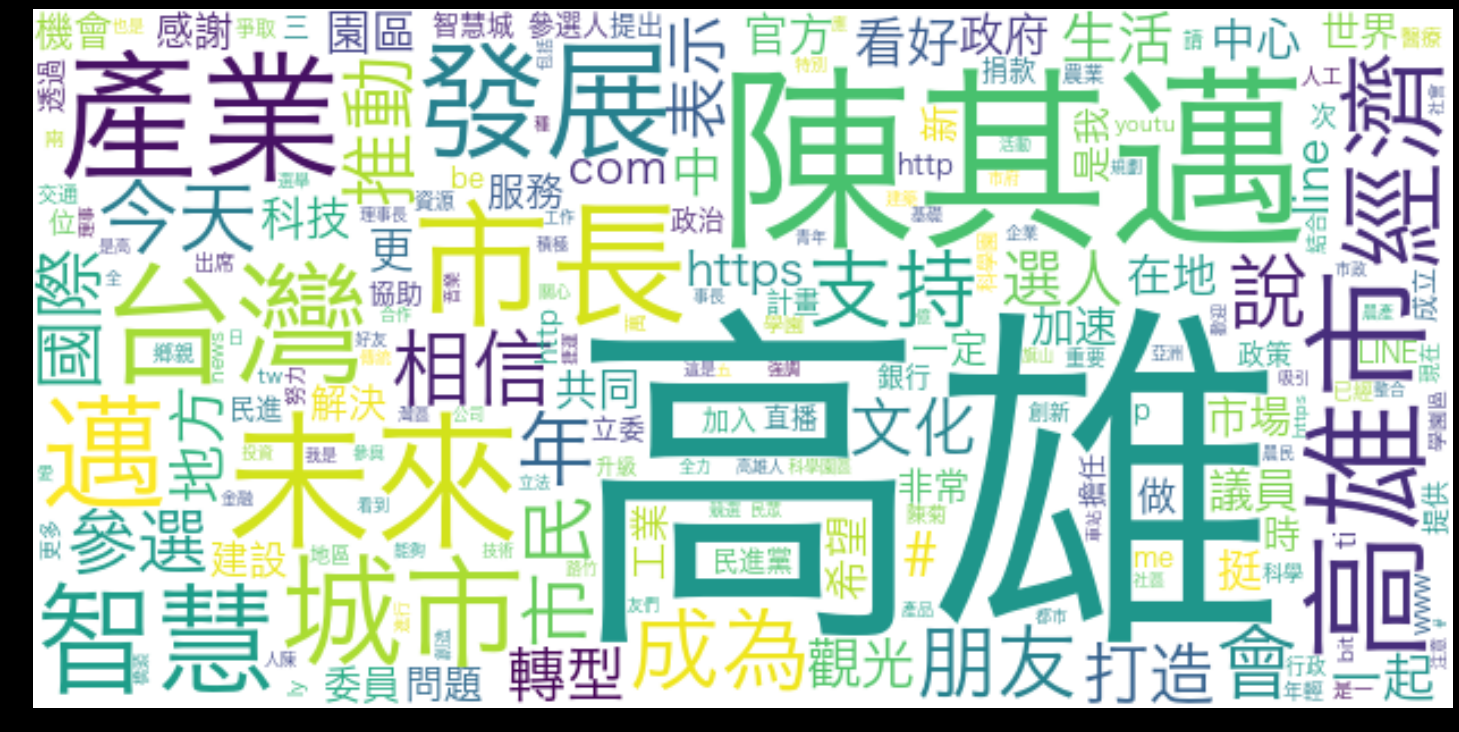

In [34]:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#È°ØÁ§∫Áî®
plt.show()

#### ÈüìÂúãÁëúÁöÑÊñáÂ≠óÈõ≤

In [35]:
text_for_han=subset_han['Message']
with open('/Users/jen/Desktop/sentence_han.txt', 'w')as f:
    for i in text_for_han:
        i=i.strip('\n')
        f.write(i)

In [76]:
filename=open("/Users/jen/Desktop/sentence_han.txt")
final=""
s=filename.read()
#terms = [t for t in jieba.cut(s, cut_all=True) if t not in stops]
#sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

['2019',
 'ÈÅì',
 'ÊõôÂÖâ',
 '\n\n',
 '2019',
 'Âπ¥',
 'ÈÅì',
 'ÊõôÂÖâ',
 'Âú®Êúù',
 'Èõ®',
 'Á∂øÁ∂ø',
 'Ë£°',
 'Â§ßÊ≠¶',
 'Â§ßÊ≠¶Â±±',
 'Ê≠¶Â±±',
 'Â±±',
 'È°õ',
 'Âá∫Áôº',
 'ÁÖß‰∫Æ',
 'Â∏ÇÂ¢É',
 'Âçó',
 'Ê®π',
 'ÊúÄÈ´ò',
 'È´òÊûù',
 'Á™ÅÁÑ∂',
 'ÊÉ≥Âà∞',
 '‰∫Ü‰∏Ä',
 'Âè•',
 '‰ΩõÂÆ∂',
 'Ë™û',
 'Ê≥ïÂñú',
 'ÂÖÖÊªø',
 'ÁÆó‰∏ç‰∏ä',
 '‰øÆË°å',
 'Ë°åËÄÖ',
 'ÁúüÂàá',
 'ÊÑüÂèó',
 'ÊÑüÂèóÂà∞',
 'ÈÄôÂ§©',
 'Â§©Âú∞',
 'Â§©Âú∞‰∫∫',
 '‰∫∫Èñì',
 'Ê≠£',
 'ËÉΩÈáè',
 'ËëóÁúº',
 'ÁúºÂâç',
 'Áâá',
 'Êªâ',
 'Êºæ',
 'Êµ©ÁÄö',
 'Êñ∞Âπ¥',
 'Êô®ÂÖâ',
 'È¢®Èõ®',
 '‰πãÂæå',
 'Á†•Á§™',
 'ÈáçÁîü',
 'Â∏ÇÂ¢É',
 'Âçó',
 'Ê®π',
 'Ë¶∫Âæó',
 'ÂæóËá™',
 'ÂÖÖÊªø',
 'ÂäõÈáè',
 'Â∏åÊúõ',
 'ËøéÂêë',
 'Áôæ‰∫ã',
 'Ëàâ',
 'ÊúüÁõº',
 'Â•áËπü',
 '2019',
 'Âπ¥',
 '\n\n',
 'ÊÑüË¨ù',
 '‰Ωç',
 'Êàë‰∏Ä',
 '‰∏ÄËµ∑',
 'ËøéÊé•',
 'Êñ∞Âπ¥',
 'Êó•Âá∫',
 'Â∏åÊúõ',
 'Êú™‰æÜ',
 '‰∏ÄÂπ¥',
 '365',
 'Â§©',
 'Â§©Â§©',
 'ÈÄô‰∏Ä',
 '‰∏ÄÊ®π',
 'Ê∞¥Áè†',
 'ÈñÉÈñÉ',
 'Âçó',
 'Ê®π',
 'ÊõôÂÖâ',
 'Ê∫´ÊΩ§',
 'ÁæéÂ•Ω',
 '\n\n',
 'Áõ∏Èóú',
 'ÈóúÊñ∞',
 'Êñ∞

In [77]:
with open('/Users/jen/Desktop/sentence_han_terms.txt', 'w')as f:
    for i in terms:
        i=i.strip('\n')
        f.write(i)

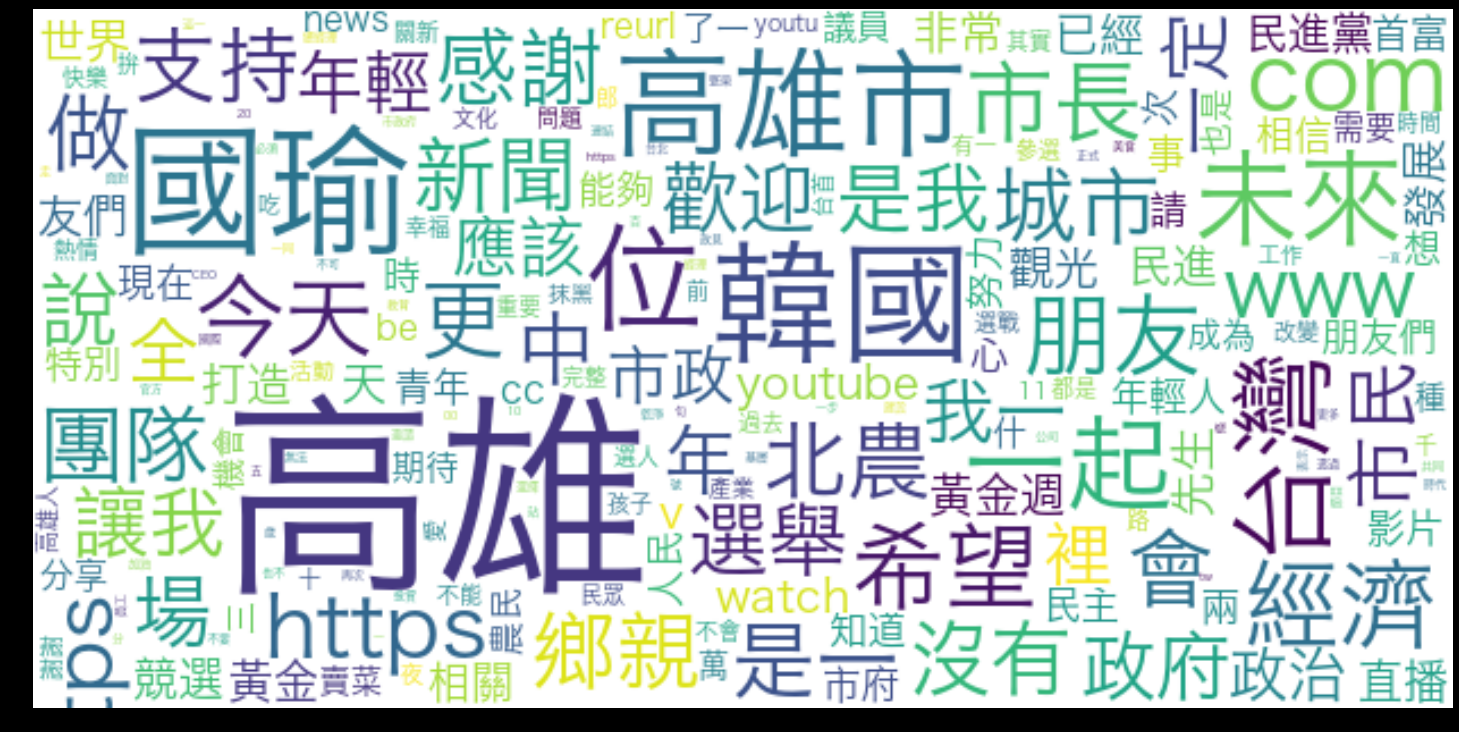

In [38]:
#Â≠óÈ´îË®≠ÂÆö
font = 'Hiragino Sans GB.ttc'
#ÊÉ≥Ë¶ÅÊñáÂ≠óÈõ≤Âá∫ÁèæÁöÑÂúñÁ§∫
mask = np.array(Image.open(r"/Users/jen/Desktop/ÂúñÁâá 1.jpg"))
my_wordcloud = WordCloud(background_color="white",mask=mask,font_path=font,collocations=False, width=2400, height=2400, margin=2)  
my_wordcloud.generate_from_frequencies(frequencies=Counter(terms))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#È°ØÁ§∫Áî®
plt.show()

## ÈóúËÅØÂàÜÊûêÔºå‰ΩøÁî®word2vec

In [98]:
import multiprocessing
import jieba
import jieba.analyse
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
with open('/Users/jen/Desktop/sentence_chen.txt',encoding='utf-8') as f:
    document = f.read()
    document_cut = jieba.cut(document)
    result = ' '.join(document_cut)
    print("type",type(result))
    with open('/Users/jen/Downloads/jieba-zh_TW-master/jieba/dict.txt', 'w',encoding="utf-8") as f2:
        f2.write(result)

# import logging
import os
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentences = word2vec.LineSentence('/Users/jen/Downloads/jieba-zh_TW-master/jieba/dict.txt')

path = get_tmpfile("word2vec.model") #ÂâµÂª∫Ëá®ÊôÇÊñá‰ª∂
model = Word2Vec(sentences, size=200, window=5, min_count=1,
                 workers=multiprocessing.cpu_count())
path = get_tmpfile("w2v_model.bin") #ÂâµÂª∫Ëá®ÊôÇÊñá‰ª∂
path1 = get_tmpfile("w2v_vector.bin") #ÂâµÂª∫Ëá®ÊôÇÊñá‰ª∂
model.save("w2v_model.bin")
model.wv.save("w2v_vector.bin")
#model.save(outp1)
#model.wv.save_word2vec_format(outp2, binary=False)
for key in model.wv.similar_by_word('‰∏≠Âúã', topn =10):
    print(key)

2019-05-08 10:55:10,269 : INFO : collecting all words and their counts
2019-05-08 10:55:10,269 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:55:10,271 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-08 10:55:10,331 : INFO : collected 13418 word types from a corpus of 134429 raw words and 5860 sentences
2019-05-08 10:55:10,332 : INFO : Loading a fresh vocabulary
2019-05-08 10:55:10,353 : INFO : effective_min_count=1 retains 13418 unique words (100% of original 13418, drops 0)
2019-05-08 10:55:10,354 : INFO : effective_min_count=1 leaves 134429 word corpus (100% of original 134429, drops 0)
2019-05-08 10:55:10,396 : INFO : deleting the raw counts dictionary of 13418 items
2019-05-08 10:55:10,397 : INFO : sample=0.001 downsamples 36 most-common words
2019-05-08 10:55:10,397 : INFO : downsampling leaves estimated 106628 word corpus (79.3% of prior 134429)
2019-05-08 10:55:10,425 : INFO : estimated required memory for 1

type <class 'str'>


2019-05-08 10:55:10,600 : INFO : training model with 4 workers on 13418 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-05-08 10:55:10,607 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:55:10,753 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-08 10:55:10,764 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-08 10:55:10,765 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-08 10:55:10,769 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-08 10:55:10,771 : INFO : EPOCH - 1 : training on 134429 raw words (106617 effective words) took 0.2s, 651339 effective words/s
2019-05-08 10:55:10,774 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:55:10,967 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-08 10:55:10,968 : INFO : worker thread finished; awaiting finish o

('Á∏ΩÂππ‰∫ã', 0.9998046159744263)
('Âè∞Âåó', 0.9997022151947021)
('ÂÑÑÂÖÉ', 0.9996898174285889)
('Á≤âÁµ≤', 0.9996726512908936)
('Ë°åÊîøÈô¢', 0.9996477961540222)
('Âºµ', 0.9996414184570312)
('Ê£íÁêÉ', 0.9996384382247925)
('ÂæåÊè¥ÊúÉ', 0.9996353983879089)
('ÊïôÊéà', 0.9996349215507507)
('Á´ãÊ≥ïÈô¢', 0.9996339082717896)


In [110]:
import multiprocessing
import jieba
import jieba.analyse
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
with open('/Users/jen/Desktop/sentence_han.txt',encoding='utf-8') as f:
    document = f.read()
    document_cut = jieba.cut(document)
    result = ' '.join(document_cut)
    print("type",type(result))
    with open('/Users/jen/Downloads/jieba-zh_TW-master/jieba/dict.txt', 'w',encoding="utf-8") as f2:
        f2.write(result)

# import logging
import os
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentences = word2vec.LineSentence('/Users/jen/Downloads/jieba-zh_TW-master/jieba/dict.txt')

path = get_tmpfile("word2vec.model") #ÂâµÂª∫Ëá®ÊôÇÊñá‰ª∂
model = Word2Vec(sentences, size=200, window=5, min_count=1,
                 workers=multiprocessing.cpu_count())
path = get_tmpfile("w2v_model.bin") #ÂâµÂª∫Ëá®ÊôÇÊñá‰ª∂
path1 = get_tmpfile("w2v_vector.bin") #ÂâµÂª∫Ëá®ÊôÇÊñá‰ª∂
model.save("w2v_model.bin")
model.wv.save("w2v_vector.bin")
#model.save(outp1)
#model.wv.save_word2vec_format(outp2, binary=False)
for key in model.wv.similar_by_word('‰∏≠Âúã', topn =10):
    print(key)

2019-05-08 11:10:29,089 : INFO : collecting all words and their counts
2019-05-08 11:10:29,090 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 11:10:29,092 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-08 11:10:29,115 : INFO : collected 8119 word types from a corpus of 42635 raw words and 1295 sentences
2019-05-08 11:10:29,117 : INFO : Loading a fresh vocabulary
2019-05-08 11:10:29,183 : INFO : effective_min_count=1 retains 8119 unique words (100% of original 8119, drops 0)
2019-05-08 11:10:29,184 : INFO : effective_min_count=1 leaves 42635 word corpus (100% of original 42635, drops 0)
2019-05-08 11:10:29,209 : INFO : deleting the raw counts dictionary of 8119 items
2019-05-08 11:10:29,210 : INFO : sample=0.001 downsamples 34 most-common words
2019-05-08 11:10:29,211 : INFO : downsampling leaves estimated 33595 word corpus (78.8% of prior 42635)
2019-05-08 11:10:29,227 : INFO : estimated required memory for 8119 words

type <class 'str'>


2019-05-08 11:10:29,341 : INFO : training model with 4 workers on 8119 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-05-08 11:10:29,343 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 11:10:29,379 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-08 11:10:29,381 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-08 11:10:29,383 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-08 11:10:29,387 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-08 11:10:29,387 : INFO : EPOCH - 1 : training on 42635 raw words (33616 effective words) took 0.0s, 757040 effective words/s
2019-05-08 11:10:29,390 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 11:10:29,428 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-08 11:10:29,430 : INFO : worker thread finished; awaiting finish of 2

('ËÉΩ', 0.9979747533798218)
('Ëëó', 0.9979528188705444)
('Ëá™Â∑±', 0.99794602394104)
('‰ªäÂ§©', 0.9979404211044312)
('ÂïèÈ°å', 0.99793541431427)
('ÈõñÁÑ∂', 0.9979274868965149)
('Ë®±Â§ö', 0.9979269504547119)
('Âíå', 0.9979260563850403)
('Âæû', 0.9979239106178284)
('Â∞±ÊòØ', 0.9979168176651001)


## ÁµêË´ñ

ÂæûÊñáÂ≠óÈõ≤Áúã‰æÜÔºåÈô≥ÂÖ∂ÈÇÅÁöÑÊîøÁ≠ñËºÉÈüìÂúãÁëúÊúâ‰∏ÄËá¥ÊÄßÔºå‰ΩÜ‰πüÊúâÂèØËÉΩÊòØÂõ†ÁÇ∫Èô≥ÂÖ∂ÈÇÅÁöÑË≥áÊñôÁ≠ÜÊï∏ËºÉÂ§ö„ÄÇ
Âà©Áî®ÈóúÈÄ£ÂàÜÊûêÔºåÂèØ‰ª•ÁúãÂá∫ÂÖ©‰∫∫Âú®ÂÖ±ÂêåË≠∞È°å‰∏äÔºåÈóúÂøÉÁöÑÈù¢ÂêëÊòØ‰∏çÂêåÁöÑ„ÄÇ

Êú™‰æÜÂ∏åÊúõÂèØ‰ª•ÊãøÂà∞1124ÈÅ∏ÂæåÁöÑË≥áÊñôÔºåÊàñË®±ÂèØ‰ª•ÂæûÊñáÂ≠óÊé¢ÂãòÊâæÂá∫ÊüêÂÄôÈÅ∏‰∫∫ÈÄ†ÊàêÁÇ´È¢®ÁöÑÁ∑£Áî±„ÄÇ